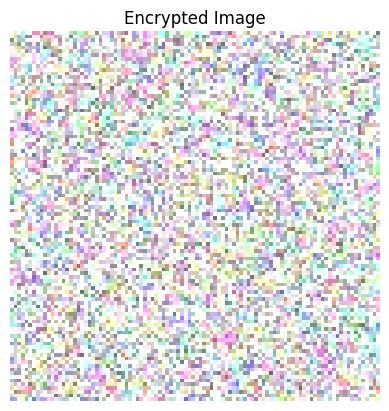

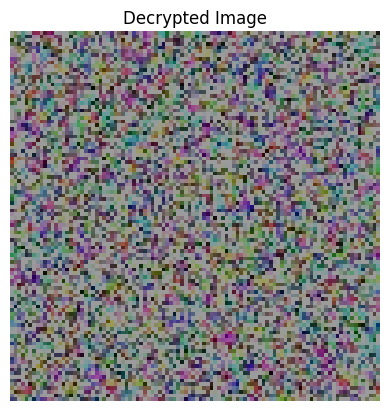

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Function to encrypt image by pixel manipulation
def encrypt_image(image_path, key=50):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    # Perform calculations using a larger integer type to avoid overflow
    encrypted_img = (image.astype(np.int32) + key) % 256
    encrypted_img = encrypted_img.astype(np.uint8)
    return encrypted_img

# Function to decrypt the image
def decrypt_image(encrypted_img, key=50):
    # Perform calculations using a larger integer type to avoid overflow
    decrypted_img = (encrypted_img.astype(np.int32) - key) % 256
    decrypted_img = decrypted_img.astype(np.uint8)
    return decrypted_img

# Function to swap pixels (simple example: reverse rows)
def swap_pixels(image):
    if image is None:
        print("Error: Input image is None for pixel swap.")
        return None
    swapped_img = np.flipud(image)
    return swapped_img

# Example usage:

# Path to your image
image_path = 'sample_image.jpg'  # Replace with your image file

# Create a dummy image if it doesn't exist
if not os.path.exists(image_path):
    dummy_image = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.imwrite(image_path, dummy_image)
    print(f"Created a dummy image at {image_path}")


# Encrypt
encrypted = encrypt_image(image_path, key=100)
if encrypted is not None:
    cv2.imwrite('encrypted_image.png', encrypted)
    # Decrypt
    decrypted = decrypt_image(encrypted, key=100)
    cv2.imwrite('decrypted_image.png', decrypted)


# Pixel Swap Example
original_img = cv2.imread(image_path)
if original_img is not None:
    swapped_img = swap_pixels(original_img)
    if swapped_img is not None:
        cv2.imwrite('swapped_image.png', swapped_img)


# Optional: Display images (for testing in Jupyter or Colab)
# plt.imshow(cv2.cvtColor(swapped_img, cv2.COLOR_BGR2RGB))
# plt.show()




import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to encrypt image
def encrypt_image(image_path, key):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    encrypted_img = cv2.add(image, key)  # Safe pixel addition
    return encrypted_img

# Function to decrypt image
def decrypt_image(encrypted_img, key):
    decrypted_img = cv2.subtract(encrypted_img, key)  # Safe pixel subtraction
    return decrypted_img

# Create a dummy image (only for demo purpose if you don't have an image)
dummy_img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
cv2.imwrite('sample_image.jpg', dummy_img)

# Encrypt
image_path = 'sample_image.jpg'
encrypted = encrypt_image(image_path, key=100)
if encrypted is not None:
    cv2.imwrite('encrypted_image.jpg', encrypted)
    plt.imshow(cv2.cvtColor(encrypted, cv2.COLOR_BGR2RGB))
    plt.title('Encrypted Image')
    plt.axis('off')
    plt.show()

# Decrypt
decrypted = decrypt_image(encrypted, key=100)
if decrypted is not None:
    cv2.imwrite('decrypted_image.jpg', decrypted)
    plt.imshow(cv2.cvtColor(decrypted, cv2.COLOR_BGR2RGB))
    plt.title('Decrypted Image')
    plt.axis('off')
    plt.show()
